In [1]:
import numpy as np
from Bio.PDB import PDBParser, Selection
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from Bio.PDB import PDBParser, Selection

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:

def calculate_distance_matrix(pdb_filename, chainID1, chainID2, cutoff, startRes1=None, endRes1=None, startRes2=None, endRes2=None, chain1_name="Chain 1", chain2_name="Chain 2"):
    extraChain_1 = ''
    extraChain_2 = ''
    # Create a PDB parser
    parser = PDBParser(QUIET=True)

    # Load the structure from the PDB file
    structure = parser.get_structure("structure", pdb_filename)

    # Get the chain objects from the structure
    chain1 = structure[0][chainID1]
    chain2 = structure[0][chainID2]
    
    #Checking if we are using the cut startRed and endRes, first we save original values to later check if 
    #any was none
    myInitVals = [startRes1, endRes1, startRes2, endRes2]

    # Set default values for startRes and endRes if not provided
    if startRes1 is None:
        startRes1 = min(r.id[1] for r in chain1)
    if endRes1 is None:
        endRes1 = max(r.id[1] for r in chain1)
    if startRes2 is None:
        startRes2 = min(r.id[1] for r in chain2)
    if endRes2 is None:
        endRes2 = max(r.id[1] for r in chain2)
        
    if myInitVals[0] is None or myInitVals[1] is None or myInitVals[2] is None or myInitVals[3] is None:
        extraChain_1 = ' ('+str(startRes1)+'-'+str(endRes1)+')'
        extraChain_2 = ' ('+str(startRes2)+'-'+str(endRes2)+')'
    
    # Initialize a distance matrix
    matrix = np.zeros((endRes1 - startRes1 + 1, endRes2 - startRes2 + 1))

    # Calculate distances between specified residues
    for i, res1 in enumerate(range(startRes1, endRes1 + 1)):
        for j, res2 in enumerate(range(startRes2, endRes2 + 1)):
            atom_list1 = Selection.unfold_entities(chain1[res1], "A")
            atom_list2 = Selection.unfold_entities(chain2[res2], "A")
            distance = min(
                atom1 - atom2
                for atom1 in atom_list1
                for atom2 in atom_list2
            )
            matrix[i, j] = distance
    
    plt.figure(figsize=(12, 8))  # Wider figure
    
    # Apply Seaborn's heatmap
    cmap = 'rocket'
    title = 'Distance Heatmap'
    sns.heatmap(matrix, cmap=cmap, annot=False, fmt=".2f", vmin=0, vmax=cutoff)
    
    # Set tick positions based on the number of residues
    max_ticks = 10  # Maximum number of ticks to show
    x_tick_count = (endRes2 - startRes2 + 1)
    y_tick_count = (endRes1 - startRes1 + 1)
    
    x_tick_step = max(1, x_tick_count // max_ticks)
    y_tick_step = max(1, y_tick_count // max_ticks)
    
    x_tick_positions = np.arange(startRes2, endRes2 + 1, x_tick_step)
    y_tick_positions = np.arange(startRes1, endRes1 + 1, y_tick_step)
    
    plt.xticks(x_tick_positions - startRes2, x_tick_positions)
    plt.yticks(y_tick_positions - startRes1, y_tick_positions)

    # Set labels and display the plot
    plt.title(title)
    plt.xlabel(chain2_name+extraChain_2)
    plt.ylabel(chain1_name+extraChain_1)
    plt.gca().xaxis.set_major_locator(MultipleLocator(base=x_tick_step))
    plt.gca().yaxis.set_major_locator(MultipleLocator(base=y_tick_step))
    plt.tight_layout()  # Ensure labels don't get cut off
    plt.show()

    return matrix


In [3]:
def plot_distance_heatmap(distance_matrix, cutoff, cmap='viridis', title='Distance Heatmap'):
    plt.figure(figsize=(10, 8))
    
    # Apply Seaborn's heatmap
    sns.heatmap(distance_matrix, cmap=cmap, annot=False, fmt=".2f", vmin=0, vmax=cutoff)
    
    plt.title(title)
    plt.xlabel('Chain 2 Residues')
    plt.ylabel('Chain 1 Residues')
    plt.show()


In [4]:
#!ls ~/Documents/YarovLab/repositories/repo-MultimerAnalysis/
!ls /home/

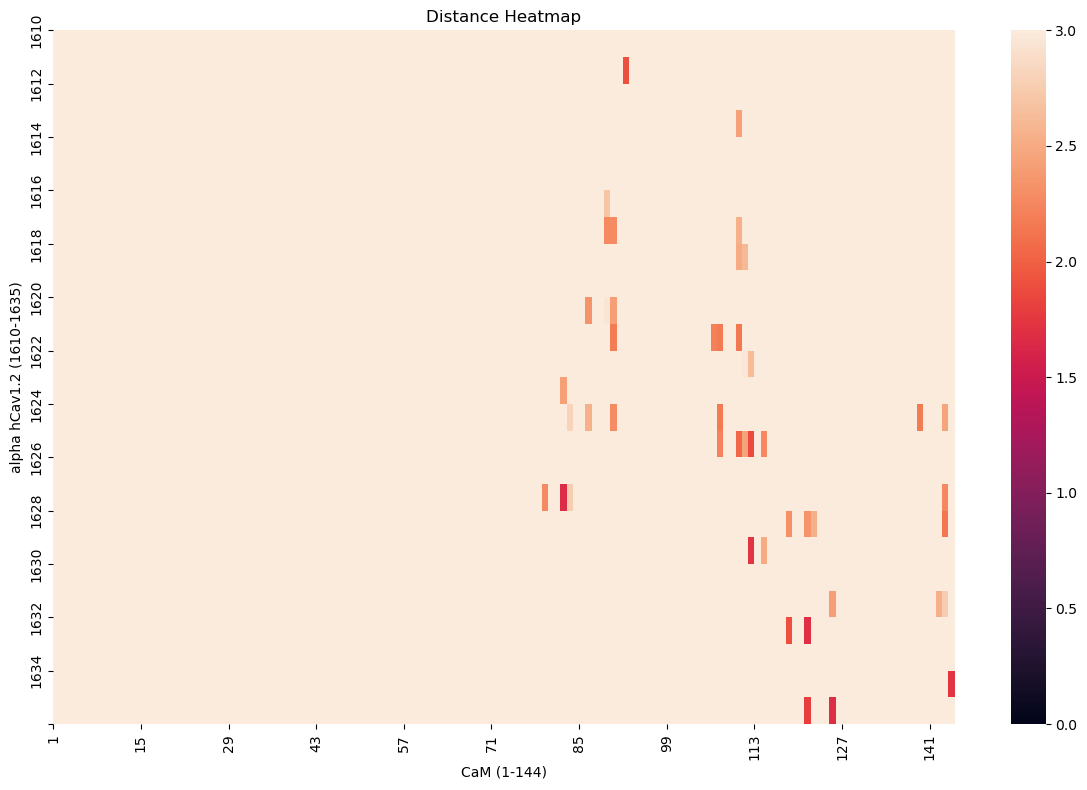

In [5]:
pdb_filename = "/Users/adrianahernandezgonzalez/Documents/YarovLab/repositories/repo-MultimerAnalysis/testCav12andCaMmultimerv3pbd70try4_3fff0_relaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb"
chainID1 = "A"
chainID2 = "B"
cutoff = 3
startRes1 = 1610
endRes1 = 1635
startRes2 = 1
endRes2 = None
chain1Name = "alpha hCav1.2"
chain2Name = "CaM"

distance_matrix = calculate_distance_matrix(pdb_filename, chainID1, chainID2, cutoff, startRes1, endRes1, startRes2, endRes2, chain1Name, chain2Name)

#print(distance_matrix)

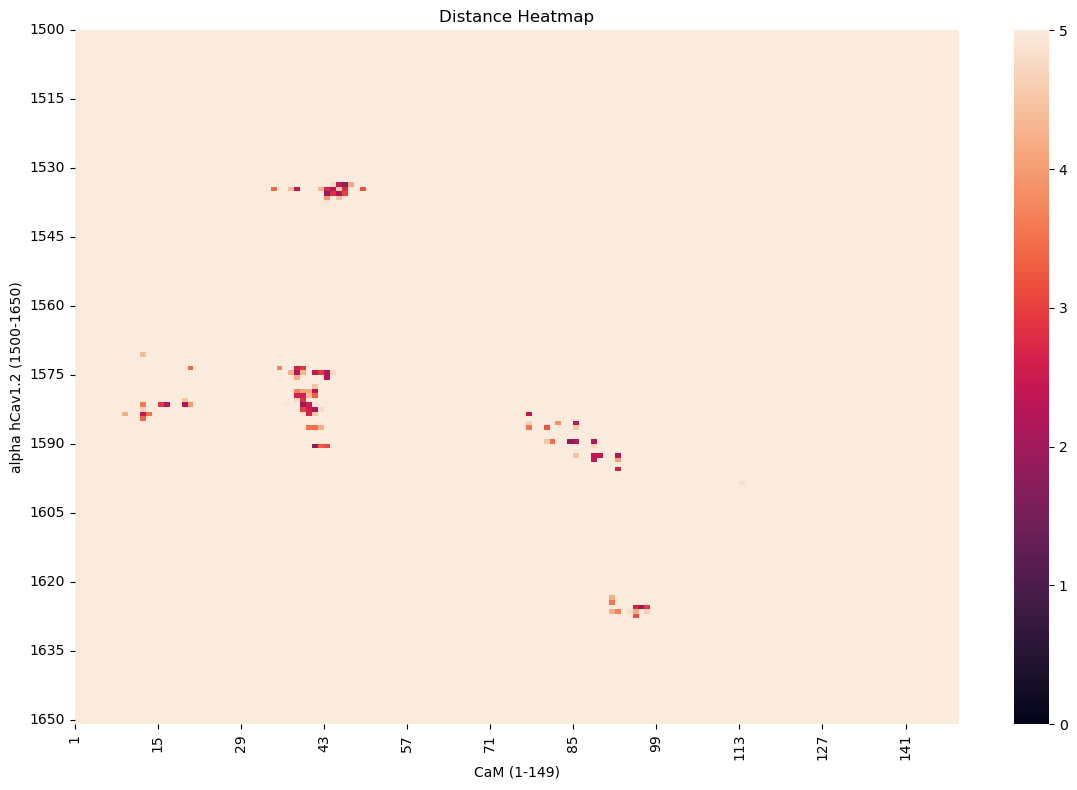

In [9]:
pdb_filename = "/Users/adrianahernandezgonzalez/Library/CloudStorage/Box-Box/Rosetta-brainstorm/Adriana/Cav channels/Cav1.2-CaM/AF/withTemplates/proteinBound/hCav1.2p_CaM_Templ/hCav1.2p_CaM_Templ_1cm1/ahCav12-CaM_relaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb"
chainID1 = "A"
chainID2 = "B"
cutoff = 5
startRes1 = 1500
endRes1 = 1650
startRes2 = 1
endRes2 = None
chain1Name = "alpha hCav1.2"
chain2Name = "CaM"

distance_matrix = calculate_distance_matrix(pdb_filename, chainID1, chainID2, cutoff, startRes1, endRes1, startRes2, endRes2, chain1Name, chain2Name)



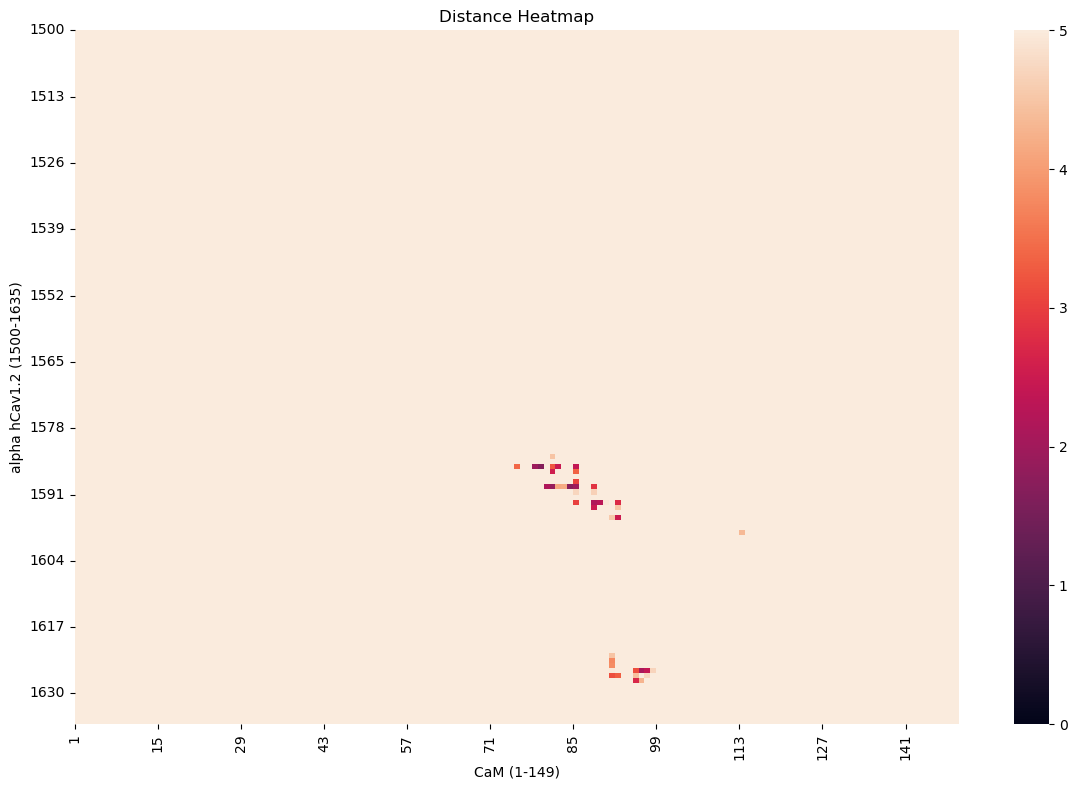

In [11]:
pdb_filename = "/Users/adrianahernandezgonzalez/Library/CloudStorage/Box-Box/Rosetta-brainstorm/Adriana/Cav channels/Cav1.2-CaM/AF/withTemplates/proteinBound/hCav1.2p_CaM_Templ/hCav1.2p_CaM_Templ_1cm1/ahCav12-CaM_relaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb"
chainID1 = "A"
chainID2 = "B"
cutoff = 5
startRes1 = 1500
endRes1 = 1635
startRes2 = 1
endRes2 = None
chain1Name = "alpha hCav1.2"
chain2Name = "CaM"

distance_matrix = calculate_distance_matrix(pdb_filename, chainID1, chainID2, cutoff, startRes1, endRes1, startRes2, endRes2, chain1Name, chain2Name)

